# https://jovian.com/ingledarshan/decision-trees-titanic-dataset#section2

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
# import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [6]:
median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age, inplace = True)

In [7]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [8]:
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

In [9]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [10]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [11]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [12]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [13]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [14]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


Text(0.5, 1.0, 'Pair Plot')

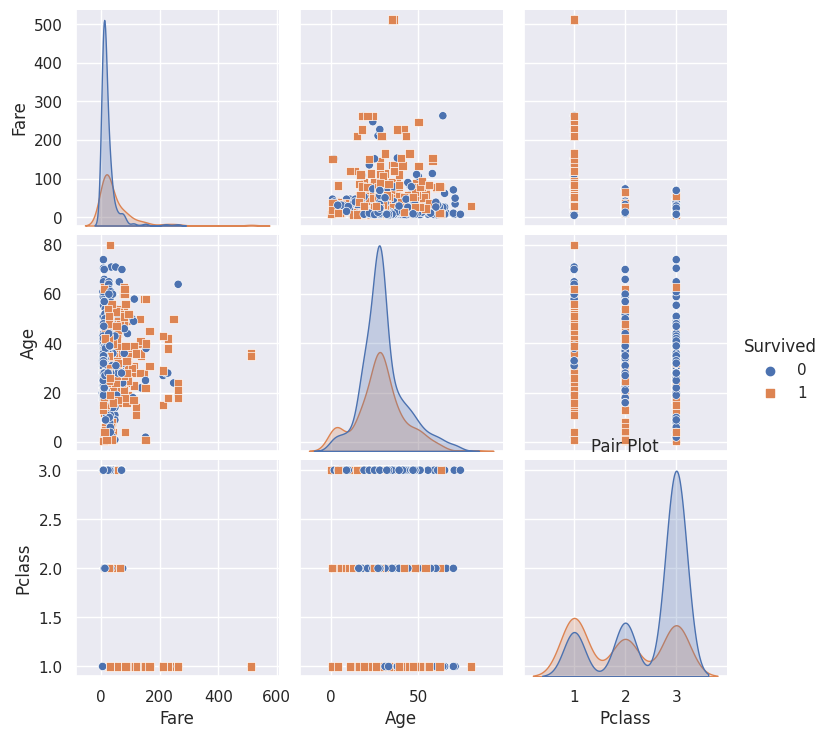

In [15]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

<ipython-input-16-7cb2ee0d6d88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_data.corr()


Text(0.5, 1.0, 'Correlation between features')

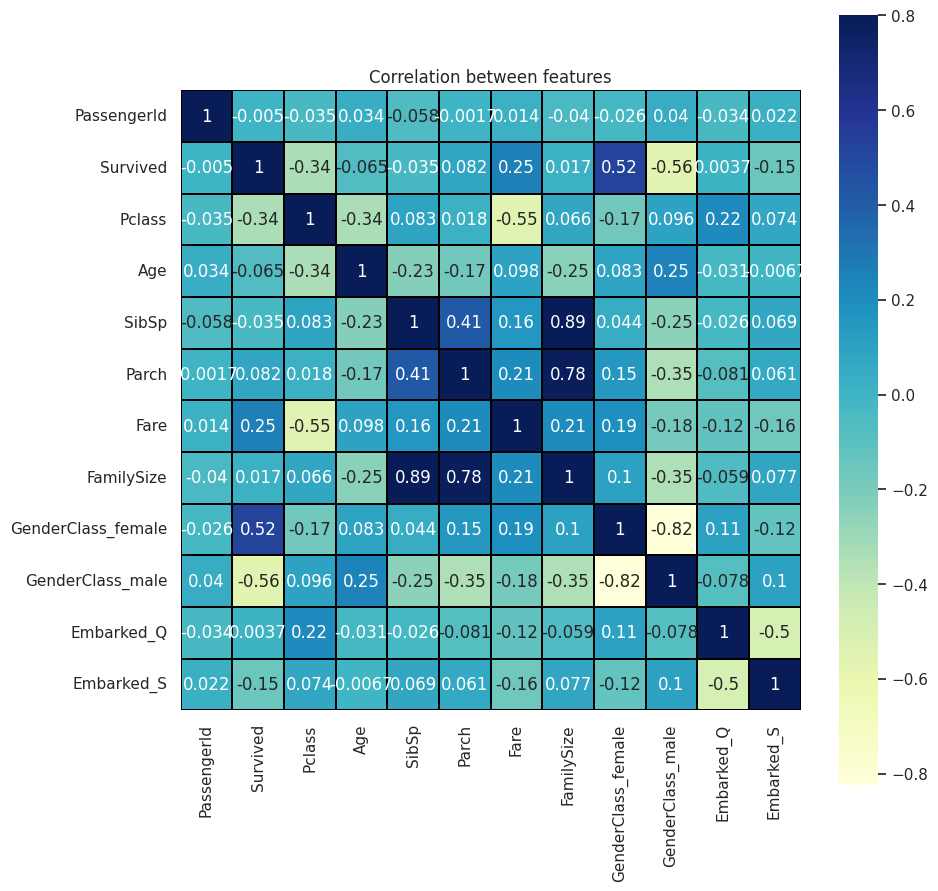

In [16]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [17]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [18]:
y = titanic.Survived

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_6 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 28.86
|   |   |   |--- feature_3 <= 28.23
|   |   |   |   |--- feature_0 <= 48.00
|   |   |   |   |   |--- feature_0 <= 29.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  29.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  48.00
|   |   |   |   |   |--- feature_0 <= 843.50
|   |   |   |   |   |   |--- feature_0 <= 373.00
|   |   |   |   |   |   |   |--- feature_0 <= 352.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 27.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 25.00
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 13.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  13.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  25.00
|   |   |   |   |   |   |   |   |   |   |--- class: 

[Text(0.42407594086021505, 0.9705882352941176, 'x[6] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(0.1620967741935484, 0.9117647058823529, 'x[1] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]'),
 Text(0.08817204301075268, 0.8529411764705882, 'x[3] <= 28.856\ngini = 0.089\nsamples = 150\nvalue = [7, 143]'),
 Text(0.06451612903225806, 0.7941176470588235, 'x[3] <= 28.231\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(0.05591397849462366, 0.7352941176470589, 'x[0] <= 48.0\ngini = 0.155\nsamples = 59\nvalue = [5, 54]'),
 Text(0.034408602150537634, 0.6764705882352942, 'x[0] <= 29.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.025806451612903226, 0.6176470588235294, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.043010752688172046, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07741935483870968, 0.6764705882352942, 'x[0] <= 843.5\ngini = 0.133\nsamples = 56\nvalue = [4, 52]'),
 Text(0.060215053763440864, 0.617647058823529

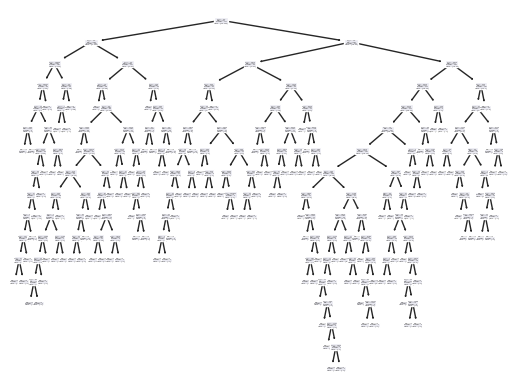

In [23]:
from sklearn import tree
tree.plot_tree(model)

In [24]:
y_pred_train = model.predict(X_train)

In [25]:
y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.776536312849162


In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  88                  18
Actual Survived              22                  51
